

# Yield Curve Construction

Interest rates provide a fairly good standard for applying PCA and getting a good feel for the characteristics of the interest rate curves. In this case study we use  Principal Component Analysis (PCA) to generate the "typical" movements of a yield curve and show that the first 3 principal components correspond to yields, slope, and curvature respectively.  We implement PCA for the treasury rates. the spread between these two.

In this case study, we perform automatized unsupervised machine learning Principal Component Analysis (PCA) on the Dow Jones Industrial Average index and it's respective 30 stocks to construct an optimized diversified intelligent portfolio.

Things to focus on in this case study: 

* Understand the intuition behind the eigenvectors or the pricinpal components.
* Using lower number of dimensions after performing dimensionality reduction to reproduce the actual data. 
* Visualise the results and reconstruct the original data using the principal components.
* Loading data from the extenal sources such as quandl.


## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Finding the Best Eigen Portfolio](#4.2.2)
        * [5.2.3. Backtesting Eigenportfolio](#4.2.3)

<a id='0'></a>
# 1. Introduction

Our goal in this jupyter notebook is to understand how to work through a dimensionality reduction models problem end-to-end. This notebook is applicable for all kinds of dimensionity reduction problems.


We import the pandas dataframe containing all the adjusted closing prices for all the companies in the DJIA as well as the DJIA's index. Because our starting date was the year 2000, the adjusted closing prices for Dow Chemicals and Visa appear as Not a Number values. For this we will take away both respective columns. We will end up with 28 columns of companies information and an additional one for the DJIA index.

We use the metrices of the portfolio performance defined below:

Sharpe Ratio: The sharpe ratio explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and lower volatility for the specified portfolio.

Annualized Returns: We have to apply the geometric average of all the returns in respect to the periods per year (days of operations in the exchange in a year).

Annualized Volatility: We have to take the standard deviation of the returns and multiply it by the square root of the periods per year.
Annualized Sharpe: we compute the ratio by dividing the annualized returns against the annualized volatility.
Optimized Portfolio

We compute an iterable loop to compute the principle component's weights for each Eigen Portfolio, which then uses the sharpe ratio function to look for the portfolio with the highest sharpe ratio. Once we know which portfolio has the highest sharpe ratio, we can visualize its performance against the DJIA Index to understand how it outperforms it.


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [156]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import quandl

#Import Model Packages 
from sklearn.decomposition import PCA

<a id='1.2'></a>
## 2.2. Loading the Data

In [157]:
quandl.ApiConfig.api_key = 'tH8x1csKSWgxUcqdRifB'
#quandl.ApiConfig.api_key = 'QUANDL_API_KEY'

In [158]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [159]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [160]:
dataset = treasury_df
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [161]:
# shape
dataset.shape

(14420, 11)

In [162]:
# peek at data
set_option('display.width', 100)
dataset.tail(5)

TRESY1mo  TRESY3mo  TRESY6mo  TRESY1y  TRESY2y  TRESY3y  TRESY5y  TRESY7y  TRESY10y  \
Date                                                                                              
2019-09-20      1.95      1.91      1.91     1.84     1.69     1.63     1.61     1.68      1.74   
2019-09-23      1.94      1.94      1.93     1.81     1.68     1.61     1.59     1.65      1.72   
2019-09-24      1.90      1.92      1.91     1.78     1.60     1.53     1.52     1.58      1.64   
2019-09-25      1.80      1.89      1.90     1.82     1.68     1.61     1.60     1.66      1.73   
2019-09-26      1.91      1.83      1.88     1.79     1.66     1.61     1.59     1.65      1.70   

            TRESY20y  TRESY30y  
Date                            
2019-09-20      1.99      2.17  
2019-09-23      1.98      2.16  
2019-09-24      1.91      2.09  
2019-09-25      1.99      2.18  
2019-09-26      1.96      2.15

In [163]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

TRESY1mo    float64
TRESY3mo    float64
TRESY6mo    float64
TRESY1y     float64
TRESY2y     float64
TRESY3y     float64
TRESY5y     float64
TRESY7y     float64
TRESY10y    float64
TRESY20y    float64
TRESY30y    float64
dtype: object

In [164]:
# describe data
set_option('precision', 3)
dataset.describe()

TRESY1mo  TRESY3mo  TRESY6mo    TRESY1y    TRESY2y    TRESY3y    TRESY5y    TRESY7y  \
count  4542.000  9437.000  9437.000  14420.000  10828.000  14420.000  14420.000  12550.000   
mean      1.293     3.919     4.102      5.113      5.297      5.533      5.799      6.194   
std       1.496     3.121     3.222      3.397      3.757      3.260      3.113      3.157   
min       0.000     0.000     0.020      0.080      0.160      0.280      0.560      0.910   
25%       0.060     0.960     1.060      2.570      1.860      3.270      3.630      3.610   
50%       0.880     3.970     4.210      5.130      5.200      5.530      5.710      6.240   
75%       1.990     5.830     6.100      7.000      7.680      7.410      7.640      7.960   
max       5.270    15.490    15.670     17.310     16.950     16.590     16.270     16.050   

        TRESY10y  TRESY20y  TRESY30y  
count  14420.000  6502.000  9656.000  
mean       6.136     4.634     6.756  
std        2.891     1.588     3.036  
min        1.370     1.690     1.940  
25%        4.070     3.020     4.260  
50%        5.890     4.740     6.560  
75%        7.790     5.880     8.610  
max       15.840     8.300    15.210

<a id='2.2'></a>
## 3.2. Data Visualization

Looking at the movement of the rates

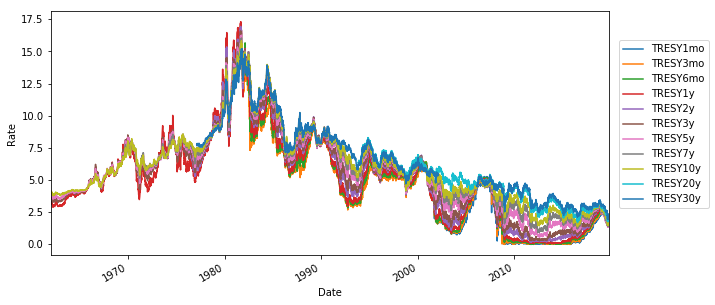

In [165]:
dataset.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

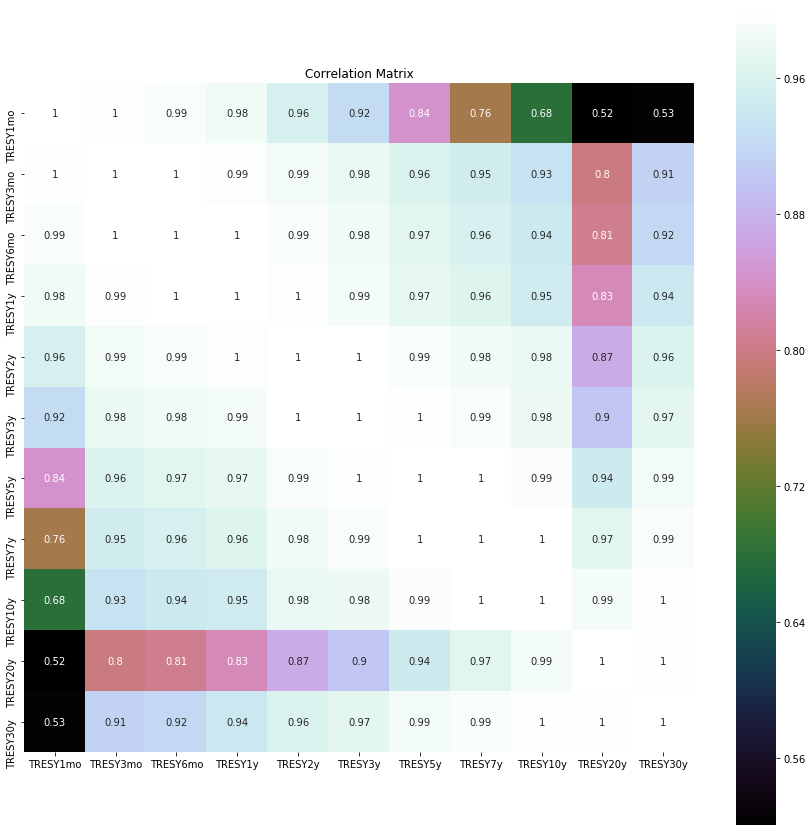

In [166]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [167]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Given that there are null values drop the rown contianing the null values.

In [168]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

TRESY1mo  TRESY3mo  TRESY6mo  TRESY1y  TRESY2y  TRESY3y  TRESY5y  TRESY7y  TRESY10y  \
Date                                                                                              
2001-07-31      3.67      3.54      3.47     3.53     3.79     4.06     4.57     4.86      5.07   
2001-08-01      3.65      3.53      3.47     3.56     3.83     4.09     4.62     4.90      5.11   

            TRESY20y  TRESY30y  
Date                            
2001-07-31      5.61      5.51  
2001-08-01      5.63      5.53

<a id='3.2'></a>
## 4.2. Data Transformation

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns = dataset.columns, index = dataset.index)
# summarize transformed data
dataset.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

TRESY1mo  TRESY3mo  TRESY6mo  TRESY1y  TRESY2y  TRESY3y  TRESY5y  TRESY7y  TRESY10y  \
Date                                                                                              
2001-07-31     1.590     1.443     1.297    1.294    1.380    1.474    1.647    1.705     1.697   
2001-08-01     1.576     1.436     1.297    1.313    1.408    1.496    1.688    1.740     1.734   

            TRESY20y  TRESY30y  
Date                            
2001-07-31     1.612     1.405  
2001-08-01     1.630     1.424

__Visualising the standardised dataset__

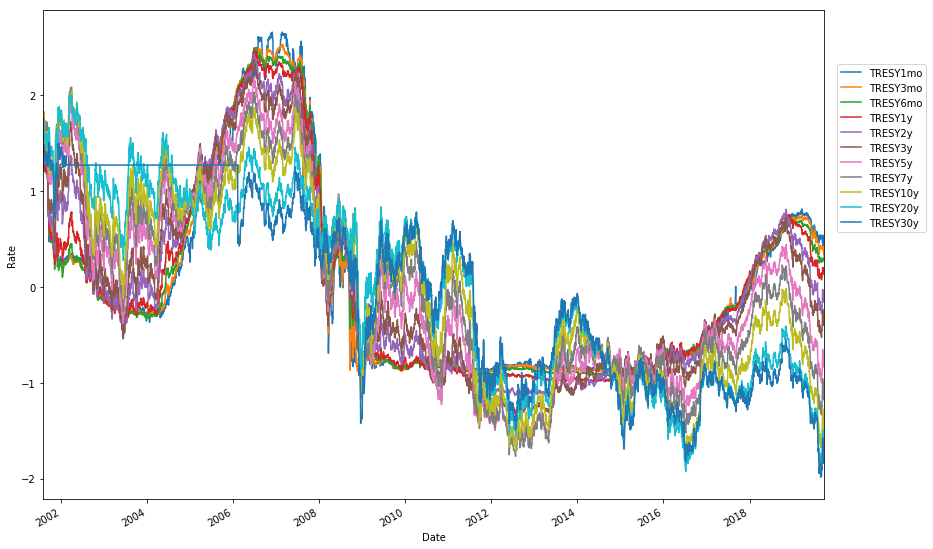

In [204]:
rescaledDataset.plot(figsize=(14,10))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.2'></a>
## 5.2. Model Evaluation- Applying Principle Component Analysis

As the next step We create a function to compute Principle Component Analysis from Sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.

In [171]:
pca = PCA()
PrincipalComponent=pca.fit(rescaledDataset)

<a id='4.2.1'></a>
## 5.2.1.Explained Variance using PCA

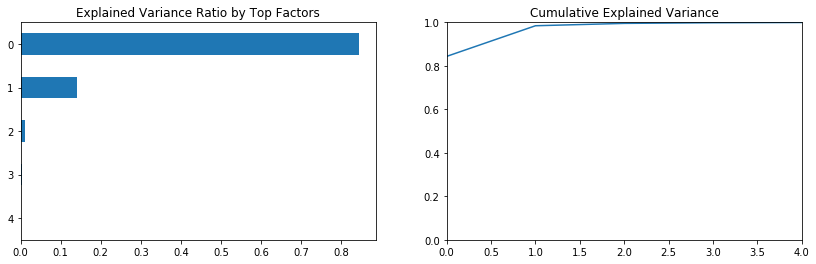

In [172]:
NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');

# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

Indeed, the first principal component accounts for 84.4% of variance, with the second principal component getting 98.44% and the third 99.53%. The first 3 principal components account for, cumulatively, 99.5% of all movements in the data. Hence, in terms of dimensionality reduction, the first 3 principal components are representative of the data.

<a id='4.2.2'></a>
## 5.2.2. Intuition Behind the Principal Components

We compute several functions to determine the weights of each principle component. We then visualize a scatterplot that visualizes an organized descending plot with the respective weight of every company at the current chosen principle component.

In [173]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

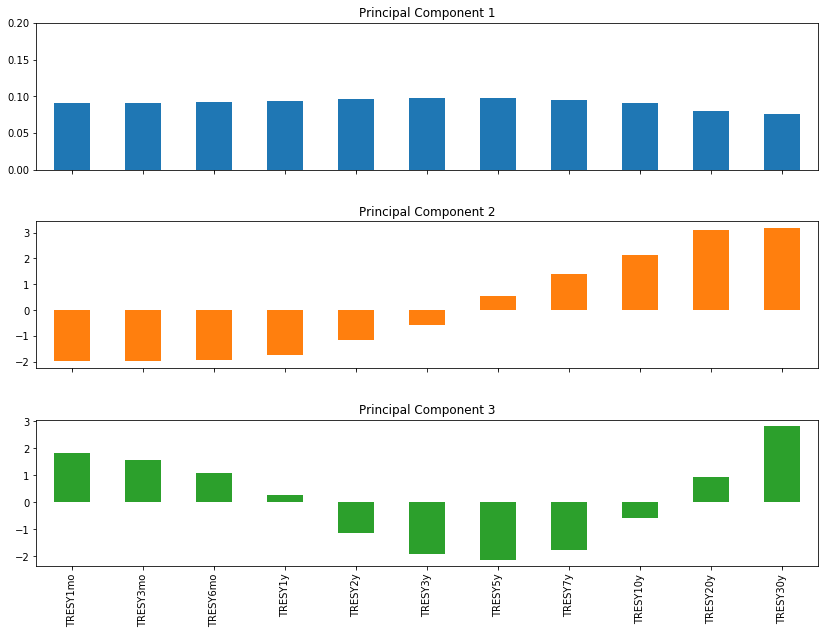

In [174]:
weights = PCWeights()
NumComponents=3    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

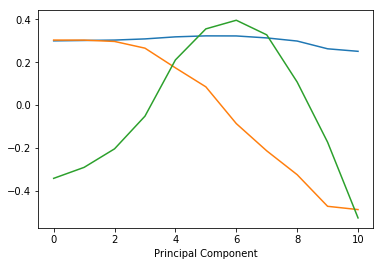

In [175]:
plt.plot(pca.components_[0:3].T)
plt.xlabel("Principal Component")
plt.show()

Looking at the the interpretation of the first three principal components, they should correspond to:

__Principal Component 1__: Directional movements in the yield curve. These are movements that shift the entire yield curve up or down.

__Principal Component 2__: Slope movements in the yield curve. These are movements that steepen or flatten (change the first derivative wrt maturity) the entire yield curve.

__Principal Component 3__: Curvature movements in the yield curve. These are movements that change the curvature (or the second derivative wrt maturity) of the entire yield curve.

The detailed interpretation is as follows:

__Principal Component 1 (PC1)__: All of the tenors of Treasury Rates are weighted in the same direction. This means that PC1 reflects movements that causes IRS of all maturities to move in the same direction. This corresponds to directional movements in the yield curve,if the yield curve goes up, all yields go up be it the short end or the long end and vice versa.

__Principal Component 2 (PC2)__: Treasury Rates on the short end of the curve are weighted negatively and the ones reaching the long end (y10, y20 and y30) are weighted positively. This means that PC2 reflects movements that cause the short end to go in one direction and the long end in the other. This is exactly what slope movements do -- if the yield curve steepens, the short end goes down and the long end goes up and vice versa if the yield curve flattens.

__Principal Component 3 (PC3)__: Treasury Rates on the short and long ends of the curve are weighted positively while the ones in the middle are weighted negatively. This means that PC3 reflects movements that cause the short and long end to go in one direction, and the middle to go in the other. This is exactly what curvature movements do -- if the yield curve increases in curvature, the short and long end goes down while the middle goes up.

Hence PC1 can be interpreted as directional movements, PC2 as slope movements, and PC3 as curvature movements.

<a id='4.2.3'></a>
## 5.2.3. Reconstructing the curve using Principal Components

In [190]:
pca.transform(rescaledDataset)[:,:2]

array([[ 4.97514826, -0.48514999],
       [ 5.03634891, -0.52005102],
       [ 5.14497849, -0.58385444],
       ...,
       [-1.82544584,  2.82360062],
       [-1.69938513,  2.6936174 ],
       [-1.73186029,  2.73073137]])

One of the key features of PCA is the ability to reconstruct the initial dataset using the outputs of PCA. Using the simple matrix reconstruction, we can generate an approximation/almost exact replica of the initial data.

Mechanically PCA is just a matrix multiplication:

Y=XW,

where Y is your principal components, X is input data, and W is a matrix of coefficients.


The only trick here is that your matrix of coefficients is quite special: you can use it to recover the original matrix.

X=YW′,

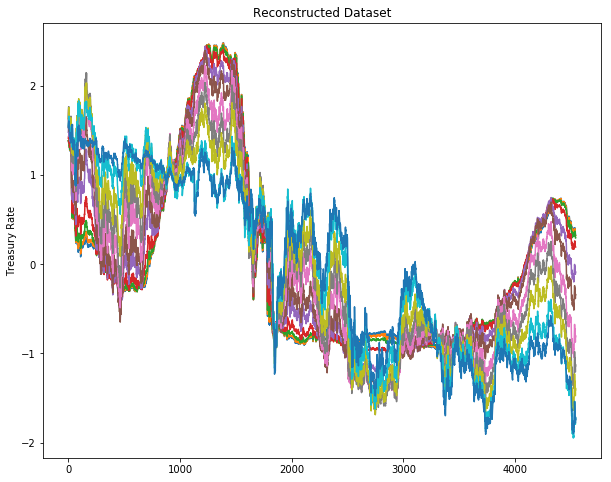

In [229]:
nComp=3
reconst= pd.DataFrame(np.dot(pca.transform(rescaledDataset)[:,:nComp], pca.components_[:nComp,:]),columns=dataset.columns)
plt.figure(figsize=(10,8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.show()

As shown in the picture above the replicated Treasury Rate Chart with three principal components is able to replicate the original data quite well

__Conclusion__

* The pricipal components are quite intuitive for this case study. The first three principal components represent directional movements, slope movements, and curvature movements respectively. 

* Given all the tenors of the treasury rate are represented by just three principal components leading to significant dimensionality reduction and these three principal components can be used to reconstruct the original time series. 

* The eigenvectors can be visualised to understand the intuitive drivers of the time series changes.

* On a different note, we have loading data from the extenal sources (such as quandl) for this case study. 
